In [54]:
#import packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style
from statistics import mean

In [55]:
# creating a dataset
def create_dataset(hm,variance, step=2, correlation =False):
    val = 1
    ys = []
    for i in range(hm):
        y = val+random.randrange(-variance, variance)
        ys.append(y)
        
        if correlation and correlation =='pos':
            val+=step
        if correlation and correlation =='neg':
            val-=step
    xs= [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64),np.array(ys, dtype=np.float64)
        

In [56]:
# The value of variance and correlation should be adjusted to check for the value of r_squared which would show the good-fit
xs,ys= create_dataset(40,80,2, correlation=False)

In [63]:
# check the random dataset that is created
print(xs,ys)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39.] [ 25. -32. -16.  24.  43. -29. -72. -15.  75.  33.  79.  47.  71.  61.
 -70. -51.  44.  28.  57. -49.  -6. -62. -51.  58.  77.  54.  12. -65.
 -26.  26.  55.  42.  45.  15.  41.  22. -50.  15. -67.  47.]


In [64]:
#Slop and intercept function defination
def best_fit_slope_intercept(xs,ys):
    m =  (((mean(xs) * mean(ys)) - mean(xs*ys)) /
         ((mean(xs)**2) - mean(xs**2)))
    b= (mean(ys)- m*mean(xs))
    return m, b
m,b = best_fit_slope_intercept(xs,ys)

print(m,b)

0.010975609756097604 10.660975609756097


In [65]:
# R_squared value 
def Squared_error(ys_orig,ys_line):
    return sum((ys_line-ys_orig)**2)
def coefficient_of_determination(ys_orig,ys_line):
    ys_mean_line=[mean(ys_line) for y in ys_orig]
    squared_error_reg= Squared_error(ys_orig,ys_line)
    squared_error_y_mean= Squared_error(ys_orig,ys_mean_line)
    return 1 - (squared_error_reg)/(squared_error_y_mean)

In [66]:
regression_line= [(m*x)+b for x in xs]

In [67]:
r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

7.239980783113609e-06


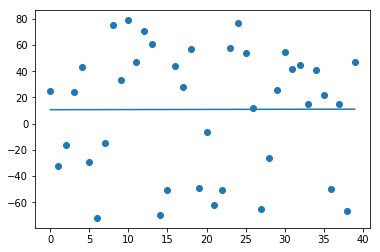

In [68]:
predict_x = 8
predict_y = (m*predict_x)+b

plt.scatter(xs,ys)
#plt.plot(predict_x,predict_y, color = 'r')
plt.plot(xs,regression_line)
plt.show()